In [2]:
svhn = gen_input.read_data_sets("train_32x32.mat", train_test_valid_split)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
svhn.train.images[0].shape

(1024, 3)

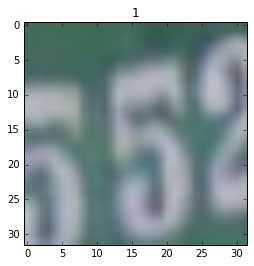

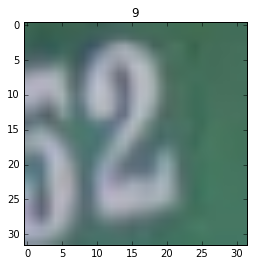

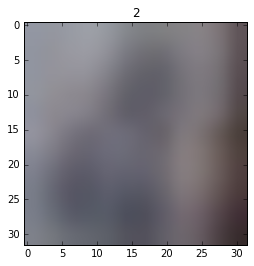

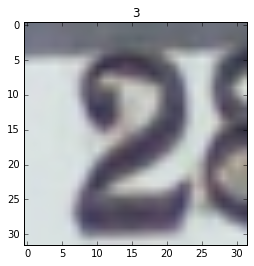

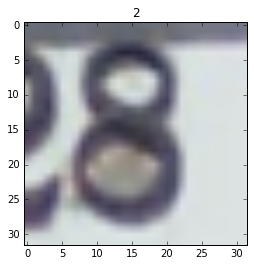

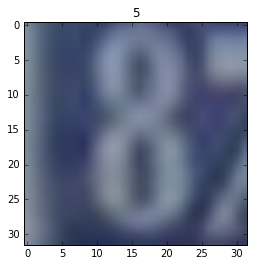

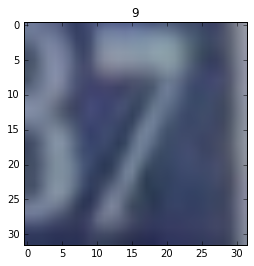

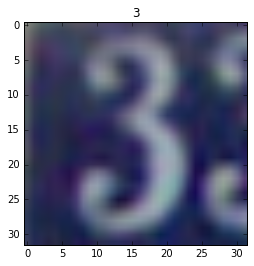

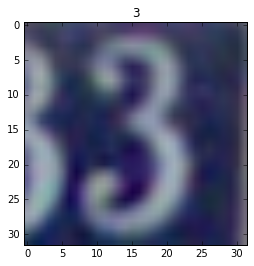

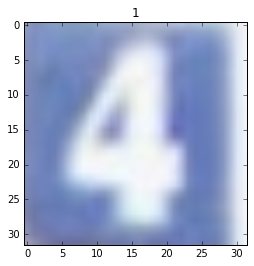

In [6]:
for i in range(0, 10):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    img = svhn.test.images[i]
    lbl = np.argmax(svhn.train.labels[i])
    ax.set_title(lbl)
    img = img.reshape([32,32,3])
    imgplot = plt.imshow(img)


In [1]:
'''
A Convolutional Network implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''
from __future__ import print_function
import gen_input
import tensorflow as tf

# Parameters
#learning_rate = 1e-3
learning_rate = 1e-3
#training_iters = 200000
training_iters = 200
#batch_size = 128
batch_size = 50
display_step = 10

# Network Parameters
n_input = 1024 # SVHN data input (img shape: 32*32)
n_classes = 10 # total classes (0-9 digits)
channels = 3
dropout = .9 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input, channels])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

train_test_valid_split = [0.7, 0.15, 0.15]
svhn = gen_input.read_data_sets("train_32x32.mat", train_test_valid_split)

# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 32, 32, channels])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, channels, 32])), # 32
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), # 16
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([8*8*64, 4096])), # 8
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([4096, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([4096])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
#     while step * batch_size < training_iters:
#         batch_x, batch_y = svhn.train.next_batch(batch_size)
#         # Run optimization op (backprop)
#         sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
#                                        keep_prob: dropout})
#         if step % display_step == 0:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
#                                                               y: batch_y,
#                                                               keep_prob: 1.})
#             print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
#                   "{:.6f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.5f}".format(acc))
#         step += 1

    while step < training_iters:
        batch_x, batch_y = svhn.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % 500 == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: svhn.test.images[:256],
                                      y: svhn.test.labels[:256],
                                      keep_prob: 1.}))


InternalError: Dst tensor is not initialized.
	 [[Node: zeros_6 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [4096,10] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op u'zeros_6', defined at:
  File "/Users/baha/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/baha/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-256c46beb8d0>", line 101, in <module>
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/optimizer.py", line 298, in minimize
    name=name)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/optimizer.py", line 412, in apply_gradients
    self._create_slots(var_list)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/adam.py", line 119, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/optimizer.py", line 656, in _zeros_slot
    named_slots[var] = slot_creator.create_zeros_slot(var, op_name)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/slot_creator.py", line 121, in create_zeros_slot
    val = array_ops.zeros(primary.get_shape().as_list(), dtype=dtype)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1370, in zeros
    output = constant(zero, shape=shape, dtype=dtype, name=name)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/constant_op.py", line 169, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/baha/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Dst tensor is not initialized.
	 [[Node: zeros_6 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [4096,10] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
